In [0]:
import os
import glob
import zipfile
import functools



import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
import cv2 as cv

In [0]:
from skimage import io
from skimage.segmentation import quickshift
import glob
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K
from keras import utils

Using TensorFlow backend.


In [4]:
!git clone https://github.com/Nilanshrajput/interiit_techmeet.git

Cloning into 'interiit_techmeet'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.
Checking out files: 100% (32/32), done.


In [0]:
os.mkdir("interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data")

In [0]:
os.mkdir("interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt")
os.mkdir("interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat")


In [0]:
PATH="interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data"
img_dir = os.path.join(PATH, "sat")
label_dir = os.path.join(PATH, "gt")

In [0]:
def scale_percentile(matrix):
    """Fixes the pixel value range to 2%-98% original distribution of values"""
    orig_shape = matrix.shape
    matrix = np.reshape(matrix, [matrix.shape[0]*matrix.shape[1], 3]).astype(float)
    
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    
    matrix = (matrix - mins[None,:])/maxs[None,:]
    matrix = np.reshape(matrix, orig_shape)
    matrix = matrix.clip(0,1)
    return matrix

def scale_percentile_without_normalization(matrix):
    """Fixes the pixel value range to 2%-98% original distribution of values"""
    orig_shape = matrix.shape
    matrix = np.reshape(matrix, [matrix.shape[0]*matrix.shape[1], 3]).astype(float)
    
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    
    matrix = (matrix - mins[None,:])/maxs[None,:]
    matrix = np.reshape(matrix, orig_shape)
    #matrix = matrix.clip(0,1)
    return matrix
def stretch_8bit(bands, lower_percent=2, higher_percent=98):
    out = np.z|eros_like(bands).astype(np.float32)
    for i in range(3):
        a = 0
        b = 1
        c = np.percentile(bands[:, :, i], lower_percent)
        d = np.percentile(bands[:, :, i], higher_percent)
        t = a + (bands[:, :, i] - c) * (b - a) / (d - c)
        t[t < a] = a
        t[t > b] = b
        out[:, :, i] = t
    return out.astype(np.float32)

In [0]:
mypath = 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
sz=(256,256)
for n in range(0, len(onlyfiles)):
    
    fname=os.path.join(label_dir, "{}.png".format(n))
    os.remove(fname)
    print(n)

    

In [10]:
mypath2 = 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath2, f))]
sz=(256,256)
for n in range(0, 14):
    
    fname=os.path.join(img_dir, "{}.png".format(n))
    os.remove(fname)
    print(n)


FileNotFoundError: ignored

In [11]:
mypath = 'interiit_techmeet/The-Eye-in-the-Sky-dataset/gt'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
sz=(256,256)
k = 0

images = []
for n in range(0, len(onlyfiles)):
    im = io.imread(os.path.join(mypath, onlyfiles[n]))
    fname=os.path.join(label_dir, "{}.png".format(n))
    plt.imsave(fname, im)
    im=resize(im, sz)#.reshape(-1)
    images.append(im)
    print(im.shape)
    #df2 = pd.DataFrame(im.reshape(-1))
    #df = pd.concat([df, df2], axis=1, ignore_index=True)
    k = k + 1
    print(k)
#print(df)


   
images_gt = np.asarray(images)

print(images_gt.shape)
   

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(256, 256, 3)
1
(256, 256, 3)
2
(256, 256, 3)
3
(256, 256, 3)
4
(256, 256, 3)
5
(256, 256, 3)
6
(256, 256, 3)
7
(256, 256, 3)
8
(256, 256, 3)
9
(256, 256, 3)
10
(256, 256, 3)
11
(256, 256, 3)
12
(256, 256, 3)
13
(256, 256, 3)
14
(14, 256, 256, 3)


In [12]:


mypath = 'interiit_techmeet/The-Eye-in-the-Sky-dataset/sat'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


images_sat = []

for n in range(0, len(onlyfiles)):
    im = io.imread(os.path.join(mypath, onlyfiles[n]))
    im_rgb=im[...,0:3]
    
    fixed_im = scale_percentile(im_rgb)
    im=fixed_im
    print(fixed_im.shape)
    fname=os.path.join(img_dir, "{}.png".format(n))
    plt.imsave(fname, fixed_im)
    im=resize(im, sz)#.reshape(-1)
    
    images_sat.append(im)
    print(im.shape)
    #df2 = pd.DataFrame(im.reshape(-1))
    #df = pd.concat([df, df2], axis=1, ignore_index=True)
    
    print(n)
#print(df)
   
images_sat = np.asarray(images_sat)
print(images_sat[2])

print(images_sat.shape)

(1001, 1068, 3)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(256, 256, 3)
0
(957, 1050, 3)
(256, 256, 3)
1
(926, 943, 3)
(256, 256, 3)
2
(786, 910, 3)
(256, 256, 3)
3
(812, 984, 3)
(256, 256, 3)
4
(748, 800, 3)
(256, 256, 3)
5
(622, 782, 3)
(256, 256, 3)
6
(1146, 872, 3)
(256, 256, 3)
7
(1639, 1672, 3)
(256, 256, 3)
8
(1342, 1447, 3)
(256, 256, 3)
9
(1476, 1524, 3)
(256, 256, 3)
10
(1295, 1364, 3)
(256, 256, 3)
11
(1066, 1491, 3)
(256, 256, 3)
12
(1107, 1182, 3)
(256, 256, 3)
13
[[[0.29233636 0.28993307 0.30064496]
  [0.30622675 0.29133514 0.29656486]
  [0.29270441 0.27844079 0.29076733]
  ...
  [0.20047424 0.14527504 0.06057414]
  [0.19053664 0.14527504 0.05933682]
  [0.19198748 0.14727218 0.0600901 ]]

 [[0.30812396 0.27521153 0.28792407]
  [0.2954618  0.28369396 0.30365506]
  [0.30306618 0.26851085 0.28598554]
  ...
  [0.19862215 0.14752454 0.06245489]
  [0.19744234 0.14527504 0.05933682]
  [0.19761905 0.14809591 0.06108202]]

 [[0.21535109 0.17560262 0.15773307]
  [0.29869245 0.27408989 0.28401778]
  [0.300731   0.2862044  0.28603326]
  ...

In [13]:
df_x = pd.DataFrame.from_records(images_sat)
df_y = pd.DataFrame.from_records(images_gt)
print(images_sat[2].shape)

(256, 256, 3)


In [14]:
x_train_filenames = []
y_train_filenames = []
for index in range( 14):
  
  x_train_filenames.append(os.path.join(img_dir, "{}.png".format(index)))
  y_train_filenames.append(os.path.join(label_dir, "{}.png".format(index)))
  #print(index)

print(len(x_train_filenames))  

14


In [0]:
x_train_filenames, x_val_filenames, y_train_filenames, y_val_filenames = train_test_split(x_train_filenames, y_train_filenames, test_size=0.3, random_state=42)

In [16]:
num_train_examples = len(x_train_filenames)
num_val_examples = len(x_val_filenames)

print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))

Number of training examples: 9
Number of validation examples: 5


In [17]:

x_train_filenames[:10]

['interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/8.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/2.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/1.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/13.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/4.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/7.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/10.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/3.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/sat/6.png']

In [18]:

y_train_filenames[:10]

['interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/8.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/2.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/1.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/13.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/4.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/7.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/10.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/3.png',
 'interiit_techmeet/The-Eye-in-the-Sky-dataset/conv_data/gt/6.png']

**visualize** **data**

(1107, 1182, 4)
[  0  80 100 125 150 255]
(812, 984, 4)
[  0  80 100 125 150 255]
(1107, 1182, 4)
[  0  80 100 125 150 255]
(812, 984, 4)
[  0  80 100 125 150 255]
(926, 943, 4)
[  0  80 100 125 150 255]


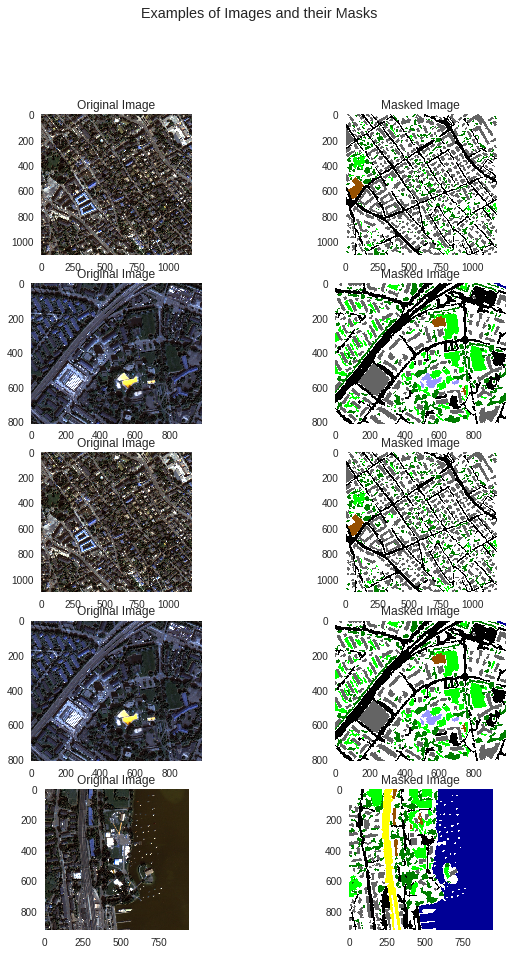

In [20]:

display_num = 5

r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(10, 15))
for i in range(0, display_num * 2, 2):
  img_num = r_choices[i // 2]
  x_pathname = x_train_filenames[img_num]
  y_pathname = y_train_filenames[img_num]
  
  plt.subplot(display_num, 2, i + 1)
  print(io.imread(x_train_filenames[img_num]).shape)
  plt.imshow((io.imread(x_pathname)[...,0:3]))
  plt.title("Original Image")
  
  example_labels = Image.open(y_pathname)
  label_vals = np.unique(example_labels)
  print(np.unique(io.imread(y_train_filenames[img_num])))
  plt.subplot(display_num, 2, i + 2)
  plt.imshow(example_labels)
  plt.title("Masked Image")  
  
plt.suptitle("Examples of Images and their Masks")
plt.show()

[[1293 1362    2]
 [1293 1362    1]
 [1293 1361    2]
 ...
 [   1    2    1]
 [   1    1    2]
 [   1    1    1]]


Text(0.5,1,'Original Image')

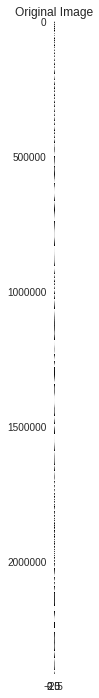

In [28]:
from skimage import feature
x_pathname = x_train_filenames[img_num]
y_pathname = y_train_filenames[img_num]

#plt.subplot(display_num, 2, i + 1)
plt.imshow((io.imread(y_pathname)))
a=feature.peak_local_max(io.imread(y_pathname))
print(a)
plt.imshow(a)
plt.title("Original Image")

In [0]:

img_shape = (256, 256, 3)
batch_size = 5
epochs = 5

**Processing each pathname**

In [0]:
def _process_pathnames(fname, label_path):
  # We map this function onto each pathname pair  
  img_str = tf.read_file(fname)
  img = tf.image.decode_jpeg(img_str, channels=3)

  label = tf.read_file(label_path)
  # These are gif images so they return as (num_frames, h, w, c)
  label_img = io.imread(label_path)
  nx = label_img.shape[1]
  ny = label_img.shape[0]
  labels = np.zeros((256, 256, 6), dtype=np.float32)
  labels[..., 5] = (label==255).astype(int)
  labels[..., 4] = (label==150).astype(int)
  labels[..., 3] = (label==125).astype(int)
  labels[..., 2] = (label==100).astype(int)
  labels[..., 1] = (label==80).astype(int)
  labels[..., 0] = (label==0).astype(int)

  # The label image should only have values of 1 or 0, indicating pixel wise
  # object (car) or not (background). We take the first channel only. 
  #label_img = label_img[:, :, 0]
  #label_img = tf.expand_dims(label_img, axis=-1)
  return img, labels

In [0]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
  """This fn will perform the horizontal or vertical shift"""
  if width_shift_range or height_shift_range:
      if width_shift_range:
        width_shift_range = tf.random_uniform([], 
                                              -width_shift_range * img_shape[1],
                                              width_shift_range * img_shape[1])
      if height_shift_range:
        height_shift_range = tf.random_uniform([],
                                               -height_shift_range * img_shape[0],
                                               height_shift_range * img_shape[0])
      # Translate both 
      output_img = tfcontrib.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
      label_img = tfcontrib.image.translate(label_img,
                                             [width_shift_range, height_shift_range])
  return output_img, label_img

In [0]:
def flip_img(horizontal_flip, tr_img, label_img):
  if horizontal_flip:
    flip_prob = tf.random_uniform([], 0.0, 1.0)
    tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
  return tr_img, label_img

In [0]:
def _augment(img,
             label_img,
             resize=None,  # Resize the image to some size e.g. [256, 256]
             scale=1,  # Scale image e.g. 1 / 255.
             hue_delta=0,  # Adjust the hue of an RGB image by random factor
             horizontal_flip=False,  # Random left right flip,
             width_shift_range=0,  # Randomly translate the image horizontally
             height_shift_range=0):  # Randomly translate the image vertically 
  if resize is not None:
    # Resize both images
    label_img = tf.image.resize_images(label_img, resize)
    img = tf.image.resize_images(img, resize)
  
  if hue_delta:
    img = tf.image.random_hue(img, hue_delta)
  
  img, label_img = flip_img(horizontal_flip, img, label_img)
  img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
  label_img = tf.to_float(label_img) * scale
  img = tf.to_float(img) * scale 
  return img, label_img


In [0]:
def get_baseline_dataset(filenames, 
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5, 
                         batch_size=batch_size,
                         shuffle=True):           
  num_x = len(filenames)
  # Create a dataset from the filenames and labels
  dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
  # Map our preprocessing function to every element in our dataset, taking
  # advantage of multithreading
  dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)
  if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
    assert batch_size == 1, "Batching images must be of the same size"

  dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
  
  if shuffle:
    dataset = dataset.shuffle(num_x)
  
  
  # It's necessary to repeat our data for all epochs 
  dataset = dataset.repeat().batch(batch_size)
  return dataset

**Set up train and validaton datasets
**

In [0]:

tr_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)



In [57]:
img,label=_process_pathnames((x_train_filenames[1]),(y_train_filenames[1]))
print(label.shape)
#plt.imshow(io.imread(y_train_filenames[1])[...,0:3])
print (label)
print(img.shape)
print(img)

AttributeError: ignored

In [0]:
val_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

In [0]:
train_ds = get_baseline_dataset(x_train_filenames,
                                y_train_filenames,
                                preproc_fn=tr_preprocessing_fn,
                                batch_size=batch_size)
val_ds = get_baseline_dataset(x_val_filenames,
                              y_val_filenames, 
                              preproc_fn=val_preprocessing_fn,
                              batch_size=batch_size)

**Let's see if our image augmentor data pipeline is producing expected results**

In [0]:
temp_ds = get_baseline_dataset(x_train_filenames, 
                               y_train_filenames,
                               preproc_fn=tr_preprocessing_fn,
                               batch_size=1,
                               shuffle=False)
# Let's examine some of these augmented images
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
with tf.Session() as sess: 
  batch_of_imgs, label = sess.run(next_element)

  # Running next element in our graph will produce a batch of images
  plt.figure(figsize=(10, 10))
  img = batch_of_imgs[0]

  plt.subplot(1, 2, 1)
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  print(label.shape)
  print(label)
  plt.imshow(label[0, :, :, :])
  plt.show()

**Building model**

In [0]:

from __future__ import division

import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Cropping2D

from keras import backend as K

import keras
import h5py

from keras.layers.normalization import BatchNormalization


from keras.optimizers import Nadam
from keras.callbacks import History
import pandas as pd
from keras.backend import categorical_crossentropy

import datetime
import os

import random
import threading

from keras.models import model_from_json

In [0]:
def conv_block(input_tensor, num_filters):
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  return encoder

def encoder_block(input_tensor, num_filters):
  encoder = conv_block(input_tensor, num_filters)
  encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
  
  return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
  decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
  decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  return decoder

In [0]:
inputs = layers.Input(shape=img_shape)

# 256
print(inputs.shape)
encoder0_pool, encoder0 = encoder_block(inputs, 32)
# 128
print(encoder0_pool.shape)
encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
# 64

encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
# 32

encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
# 16

encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
# 8

center = conv_block(encoder4_pool, 1024)
# center

decoder4 = decoder_block(center, encoder4, 512)
# 16

decoder3 = decoder_block(decoder4, encoder3, 256)
# 32

decoder2 = decoder_block(decoder3, encoder2, 128)
# 64

decoder1 = decoder_block(decoder2, encoder1, 64)
# 128

decoder0 = decoder_block(decoder1, encoder0, 32)

#encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(decoder0)






**Dedine model**

In [0]:
model = models.Model(inputs=[inputs], outputs=[outputs])

In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

In [0]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [0]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.categorical_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss


In [0]:
def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + categorical_crossentropy(y_pred, y_true)

In [0]:
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])

model.summary()

**Train model**

In [0]:
save_model_path = '/tmp/weights.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

In [0]:
epochs=500
batch_size=5

In [0]:
history = model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])

In [0]:
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [0]:
# Alternatively, load the weights directly: model.load_weights(save_model_path)
model = models.load_model(save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss,
                                                           'dice_loss': dice_loss})

In [0]:

# Let's visualize some of the outputs 
data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
  batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = batch_of_imgs[0]
  predicted_label = model.predict(batch_of_imgs)[0]

  plt.subplot(5, 3, 3 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 3, 3 * i + 2)
  plt.imshow(label[0, :, :, :])
  plt.title("Actual Mask")
  plt.subplot(5, 3, 3 * i + 3)
  plt.imshow(predicted_label[:, :, :])
  plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

In [0]:

from __future__ import division

import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Cropping2D

from keras import backend as K

import keras
import h5py

from keras.layers.normalization import BatchNormalization


from keras.optimizers import Nadam
from keras.callbacks import History
import pandas as pd
from keras.backend import binary_crossentropy

import datetime
import os

import random
import threading

from keras.models import model_from_json

img_rows = 112
img_cols = 112


smooth = 1e-12

num_channels =3
num_mask_channels = 3


def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + categorical_crossentropy(y_pred, y_true)


def get_unet0():
    inputs = Input((num_channels, img_rows, img_cols))
    conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_uniform')(inputs)
    conv1 = BatchNormalization(mode=0, axis=1)(conv1)
    conv1 = keras.layers.advanced_activations.ELU()(conv1)
    conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_uniform')(conv1)
    conv1 = BatchNormalization(mode=0, axis=1)(conv1)
    conv1 = keras.layers.advanced_activations.ELU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_uniform')(pool1)
    conv2 = BatchNormalization(mode=0, axis=1)(conv2)
    conv2 = keras.layers.advanced_activations.ELU()(conv2)
    conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_uniform')(conv2)
    conv2 = BatchNormalization(mode=0, axis=1)(conv2)
    conv2 = keras.layers.advanced_activations.ELU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_uniform')(pool2)
    conv3 = BatchNormalization(mode=0, axis=1)(conv3)
    conv3 = keras.layers.advanced_activations.ELU()(conv3)
    conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_uniform')(conv3)
    conv3 = BatchNormalization(mode=0, axis=1)(conv3)
    conv3 = keras.layers.advanced_activations.ELU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(256, 3, 3, border_mode='same', init='he_uniform')(pool3)
    conv4 = BatchNormalization(mode=0, axis=1)(conv4)
    conv4 = keras.layers.advanced_activations.ELU()(conv4)
    conv4 = Convolution2D(256, 3, 3, border_mode='same', init='he_uniform')(conv4)
    conv4 = BatchNormalization(mode=0, axis=1)(conv4)
    conv4 = keras.layers.advanced_activations.ELU()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Convolution2D(512, 3, 3, border_mode='same', init='he_uniform')(pool4)
    conv5 = BatchNormalization(mode=0, axis=1)(conv5)
    conv5 = keras.layers.advanced_activations.ELU()(conv5)
    conv5 = Convolution2D(512, 3, 3, border_mode='same', init='he_uniform')(conv5)
    conv5 = BatchNormalization(mode=0, axis=1)(conv5)
    conv5 = keras.layers.advanced_activations.ELU()(conv5)

    up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(256, 3, 3, border_mode='same', init='he_uniform')(up6)
    conv6 = BatchNormalization(mode=0, axis=1)(conv6)
    conv6 = keras.layers.advanced_activations.ELU()(conv6)
    conv6 = Convolution2D(256, 3, 3, border_mode='same', init='he_uniform')(conv6)
    conv6 = BatchNormalization(mode=0, axis=1)(conv6)
    conv6 = keras.layers.advanced_activations.ELU()(conv6)

    up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(128, 3, 3, border_mode='same', init='he_uniform')(up7)
    conv7 = BatchNormalization(mode=0, axis=1)(conv7)
    conv7 = keras.layers.advanced_activations.ELU()(conv7)
    conv7 = Convolution2D(128, 3, 3, border_mode='same', init='he_uniform')(conv7)
    conv7 = BatchNormalization(mode=0, axis=1)(conv7)
    conv7 = keras.layers.advanced_activations.ELU()(conv7)

    up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, border_mode='same', init='he_uniform')(up8)
    conv8 = BatchNormalization(mode=0, axis=1)(conv8)
    conv8 = keras.layers.advanced_activations.ELU()(conv8)
    conv8 = Convolution2D(64, 3, 3, border_mode='same', init='he_uniform')(conv8)
    conv8 = BatchNormalization(mode=0, axis=1)(conv8)
    conv8 = keras.layers.advanced_activations.ELU()(conv8)

    up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, border_mode='same', init='he_uniform')(up9)
    conv9 = BatchNormalization(mode=0, axis=1)(conv9)
    conv9 = keras.layers.advanced_activations.ELU()(conv9)
    conv9 = Convolution2D(32, 3, 3, border_mode='same', init='he_uniform')(conv9)
    crop9 = Cropping2D(cropping=((16, 16), (16, 16)))(conv9)
    conv9 = BatchNormalization(mode=0, axis=1)(crop9)
    conv9 = keras.layers.advanced_activations.ELU()(conv9)
    conv10 = Convolution2D(num_mask_channels, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    return model





def save_model(model, cross):
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    json_name = 'architecture_' + cross + '.json'
    weight_name = 'model_weights_' + cross + '.h5'
    open(os.path.join('cache', json_name), 'w').write(json_string)
    model.save_weights(os.path.join('cache', weight_name), overwrite=True)


def save_history(history, suffix):
    filename = 'history/history_' + suffix + '.csv'
    pd.DataFrame(history.history).to_csv(filename, index=False)


def read_model(cross=''):
    json_name = 'architecture_' + cross + '.json'
    weight_name = 'model_weights_' + cross + '.h5'
    model = model_from_json(open(os.path.join('../src/cache', json_name)).read())
    model.load_weights(os.path.join('../src/cache', weight_name))
    return model


if __name__ == '__main__':
    data_path = '../data'
    now = datetime.datetime.now()

    print('[{}] Creating and compiling model...'.format(str(datetime.datetime.now())))

    model = get_unet0()

    print('[{}] Reading train...'.format(str(datetime.datetime.now())))
    f = h5py.File(os.path.join(data_path, 'train_16.h5'), 'r')

    

    history = History()
    callbacks = [
        history,
    ]

    suffix = 'crops_3_'
    model.compile(optimizer=Nadam(lr=1e-3), loss=jaccard_coef_loss, metrics=['binary_crossentropy', jaccard_coef_int])
    model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])

    save_model(model, "{batch}_{epoch}_{suffix}".format(batch=batch_size, epoch=nb_epoch, suffix=suffix))
    save_history(history, suffix)

    suffix = 'crops_4_'
    model.compile(optimizer=Nadam(lr=1e-4), loss=jaccard_coef_loss, metrics=['binary_crossentropy', jaccard_coef_int])
    model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])


    save_model(model, "{batch}_{epoch}_{suffix}".format(batch=batch_size, epoch=nb_epoch, suffix=suffix))
    save_history(history, suffix)
    f.close()
